In [39]:
import pandas as pd
import numpy as np

products = pd.read_csv("products.csv", dtype={
    "product_id": "int32", "product_name": "category",
    "aisle_id": "int16", "department_id": "int8"
})

departments = pd.read_csv("departments.csv", dtype={
    "department_id": "int8", "department": "category"
})

aisles = pd.read_csv("aisles.csv", dtype={
    "aisle_id": "int16", "aisle": "category"
})

orders = pd.read_csv("orders.csv", dtype={
    "order_id": "int32", "user_id": "int32",
    "order_number": "int16", "order_dow": "int8",
    "order_hour_of_day": "int8","days_since_prior_order":"float32"
})


order_prior = pd.read_csv("order_products__prior.csv", dtype={
    "order_id": "int32", "product_id": "int32",
    "add_to_cart_order": "int16", "reordered": "int8"
})

order_train = pd.read_csv("order_products__train.csv", dtype={
    "order_id": "int32", "product_id": "int32",
    "add_to_cart_order": "int16", "reordered": "int8"
})


In [41]:
products.shape, orders.shape, order_prior.shape, order_train.shape, departments.shape, aisles.shape


((49688, 4), (3421083, 7), (32434489, 4), (1384617, 4), (21, 2), (134, 2))

In [60]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [42]:
dataframes = {
    "products": products,
    "departments": departments,
    "aisles": aisles,
    "orders": orders,
    "order_prior": order_prior,
    "order_train": order_train
}

for name, df in dataframes.items():
    print(f"\n{name.upper()} dtypes:")
    print(df.dtypes)
    print("-" * 40)



PRODUCTS dtypes:
product_id          int32
product_name     category
aisle_id            int16
department_id        int8
dtype: object
----------------------------------------

DEPARTMENTS dtypes:
department_id        int8
department       category
dtype: object
----------------------------------------

AISLES dtypes:
aisle_id       int16
aisle       category
dtype: object
----------------------------------------

ORDERS dtypes:
order_id                    int32
user_id                     int32
eval_set                   object
order_number                int16
order_dow                    int8
order_hour_of_day            int8
days_since_prior_order    float32
dtype: object
----------------------------------------

ORDER_PRIOR dtypes:
order_id             int32
product_id           int32
add_to_cart_order    int16
reordered             int8
dtype: object
----------------------------------------

ORDER_TRAIN dtypes:
order_id             int32
product_id           int32
add_to_cart_or

In [43]:
for name, df in dataframes.items():
    print(f"\n{name.upper()} missing values:")
    print(df.isna().sum())
    print("-" * 40)



PRODUCTS missing values:
product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64
----------------------------------------

DEPARTMENTS missing values:
department_id    0
department       0
dtype: int64
----------------------------------------

AISLES missing values:
aisle_id    0
aisle       0
dtype: int64
----------------------------------------

ORDERS missing values:
order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64
----------------------------------------

ORDER_PRIOR missing values:
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
----------------------------------------

ORDER_TRAIN missing values:
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [48]:
for name, df in dataframes.items():
    print(f"\n{name.upper()} DESCRIBE:")
    print(df.describe(include="all"))



PRODUCTS DESCRIBE:
          product_id       product_name      aisle_id  department_id
count   49688.000000              49688  49688.000000   49688.000000
unique           NaN              49688           NaN            NaN
top              NaN  #2 Coffee Filters           NaN            NaN
freq             NaN                  1           NaN            NaN
mean    24844.500000                NaN     67.769582      11.728687
std     14343.834425                NaN     38.316162       5.850410
min         1.000000                NaN      1.000000       1.000000
25%     12422.750000                NaN     35.000000       7.000000
50%     24844.500000                NaN     69.000000      13.000000
75%     37266.250000                NaN    100.000000      17.000000
max     49688.000000                NaN    134.000000      21.000000

DEPARTMENTS DESCRIBE:
        department_id department
count       21.000000         21
unique            NaN         21
top               NaN    alcoh

In [101]:
#Build a full product table
product_full = (
    products
    .merge(aisles, on="aisle_id", how="left")
    .merge(departments, on="department_id", how="left")
)

print("product_full shape:", product_full.shape)
product_full.head()


product_full shape: (49688, 6)


,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry


In [63]:
# Select only orders that belong to the train set
orders_train_only = orders[orders["eval_set"] == "train"].copy()

# Merge train orders with order_products__train
training_data = orders_train_only.merge(order_train,on="order_id",how="inner")

# Add product details
training_data = training_data.merge(products, on="product_id", how="left")

# Add aisle & department details
training_data = training_data.merge(aisles, on="aisle_id", how="left")
training_data = training_data.merge(departments, on="department_id", how="left")

print("training_data shape:", training_data.shape)
training_data.head()


training_data shape: (1384617, 15)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,1187899,1,train,11,4,8,14.0,196,1,1,Soda,77,7,soft drinks,beverages
1,1187899,1,train,11,4,8,14.0,25133,2,1,Organic String Cheese,21,16,packaged cheese,dairy eggs
2,1187899,1,train,11,4,8,14.0,38928,3,1,0% Greek Strained Yogurt,120,16,yogurt,dairy eggs
3,1187899,1,train,11,4,8,14.0,26405,4,1,XL Pick-A-Size Paper Towel Rolls,54,17,paper goods,household
4,1187899,1,train,11,4,8,14.0,39657,5,1,Milk Chocolate Almonds,45,19,candy chocolate,snacks


In [70]:
# Basic info about the merged training data
training_data.info()

# Missing values check
training_data.isna().sum()

# Summary statistics
training_data.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384617 entries, 0 to 1384616
Data columns (total 15 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   order_id                1384617 non-null  int32   
 1   user_id                 1384617 non-null  int32   
 2   eval_set                1384617 non-null  object  
 3   order_number            1384617 non-null  int16   
 4   order_dow               1384617 non-null  int8    
 5   order_hour_of_day       1384617 non-null  int8    
 6   days_since_prior_order  1384617 non-null  float32 
 7   product_id              1384617 non-null  int32   
 8   add_to_cart_order       1384617 non-null  int16   
 9   reordered               1384617 non-null  int8    
 10  product_name            1384617 non-null  category
 11  aisle_id                1384617 non-null  int16   
 12  department_id           1384617 non-null  int8    
 13  aisle                   1384617 non-null  

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
count,1.384617e+06,1.384617e+06,1384617,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1384617,1.384617e+06,1.384617e+06,1384617,1384617
unique,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39123,NaN,NaN,134,21
top,NaN,NaN,train,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Banana,NaN,NaN,fresh vegetables,produce
freq,NaN,NaN,1384617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18726,NaN,NaN,150609,409087
mean,1.706298e+06,1.031128e+05,NaN,1.709141e+01,2.701392e+00,1.357759e+01,1.706612e+01,2.555624e+04,8.758044e+00,5.985944e-01,NaN,7.130423e+01,9.839777e+00,NaN,NaN
std,9.897326e+05,5.948715e+04,NaN,1.661404e+01,2.167646e+00,4.238458e+00,1.041184e+01,1.412127e+04,7.423936e+00,4.901829e-01,NaN,3.810409e+01,6.292830e+00,NaN,NaN
min,1.000000e+00,1.000000e+00,NaN,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,NaN,1.000000e+00,1.000000e+00,NaN,NaN
25%,8.433700e+05,5.173200e+04,NaN,6.000000e+00,1.000000e+00,1.000000e+01,7.000000e+00,1.338000e+04,3.000000e+00,0.000000e+00,NaN,3.100000e+01,4.000000e+00,NaN,NaN
50%,1.701880e+06,1.029330e+05,NaN,1.100000e+01,3.000000e+00,1.400000e+01,1.500000e+01,2.529800e+04,7.000000e+00,1.000000e+00,NaN,8.300000e+01,8.000000e+00,NaN,NaN
75%,2.568023e+06,1.549590e+05,NaN,2.100000e+01,5.000000e+00,1.700000e+01,3.000000e+01,3.794000e+04,1.200000e+01,1.000000e+00,NaN,1.070000e+02,1.600000e+01,NaN,NaN


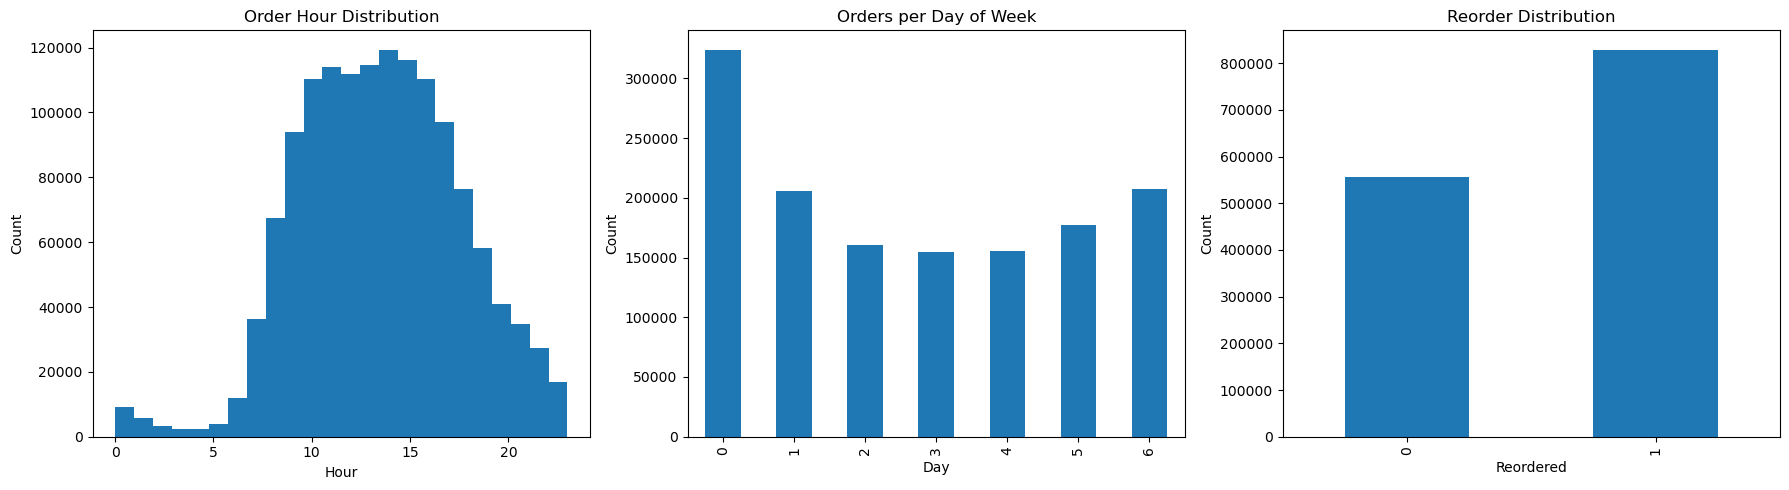

In [72]:
import matplotlib.pyplot as plt

# Plot 1: Distribution of order hour
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes[0].hist(training_data["order_hour_of_day"], bins=24)
axes[0].set_title("Order Hour Distribution")
axes[0].set_xlabel("Hour")
axes[0].set_ylabel("Count")

# Plot 2: Orders per day of week
training_data["order_dow"].value_counts().sort_index().plot(kind="bar", ax=axes[1])
axes[1].set_title("Orders per Day of Week")
axes[1].set_xlabel("Day")
axes[1].set_ylabel("Count")

# Plot 3: Reorder distribution
training_data["reordered"].value_counts().sort_index().plot(kind="bar", ax=axes[2])
axes[2].set_title("Reorder Distribution")
axes[2].set_xlabel("Reordered")
axes[2].set_ylabel("Count")

plt.tight_layout()
plt.show()


In [74]:
training_data.isna().sum()

# Missing Values:
# After merging using inner join, the training_data contains no missing values.
# Rows that had NaN values in 'days_since_prior_order' were automatically removed.


order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
aisle                     0
department                0
dtype: int64

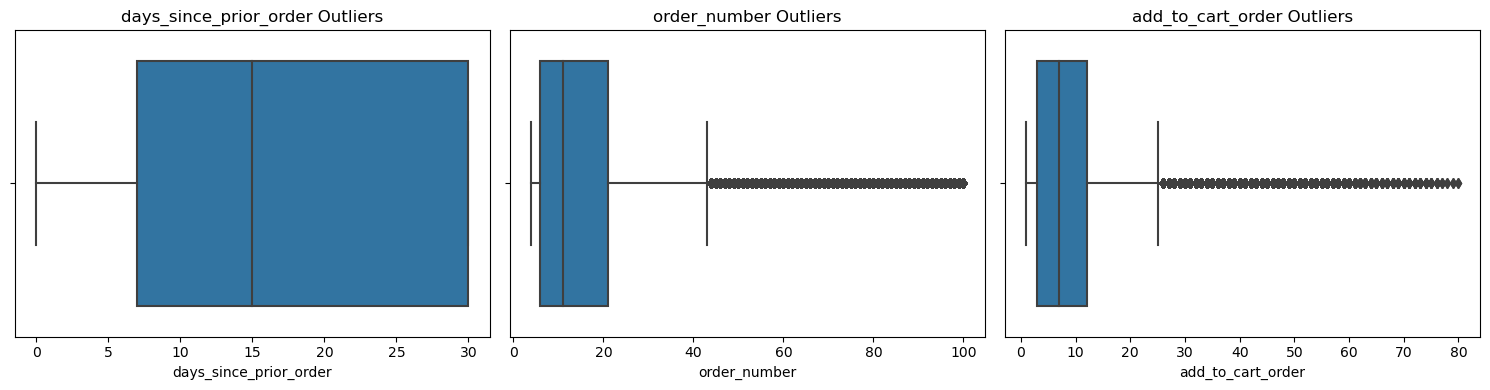

In [76]:
# Outlier Analysis:
# The boxplots show natural variation in the numeric features.
# Some values (e.g., high order_number or add_to_cart_order) appear far from the center,
# but they represent real user behavior and not errors.
# Therefore, no outlier removal is required.

import seaborn as sns
import matplotlib.pyplot as plt

cols = ["days_since_prior_order", "order_number", "add_to_cart_order"]

plt.figure(figsize=(15, 4))
for i, col in enumerate(cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=training_data[col])
    plt.title(f"{col} Outliers")

plt.tight_layout()
plt.show()

In [80]:
# Memory Optimization: convert object columns to category
for col in training_data.select_dtypes(include="object"):
    training_data[col] = training_data[col].astype("category")


In [81]:
# Downcast numeric columns to reduce memory usage
training_data["order_id"] = training_data["order_id"].astype("int32")
training_data["user_id"] = training_data["user_id"].astype("int32")
training_data["order_number"] = training_data["order_number"].astype("int16")
training_data["order_dow"] = training_data["order_dow"].astype("int8")
training_data["order_hour_of_day"] = training_data["order_hour_of_day"].astype("int8")
training_data["add_to_cart_order"] = training_data["add_to_cart_order"].astype("int16")
training_data["reordered"] = training_data["reordered"].astype("int8")


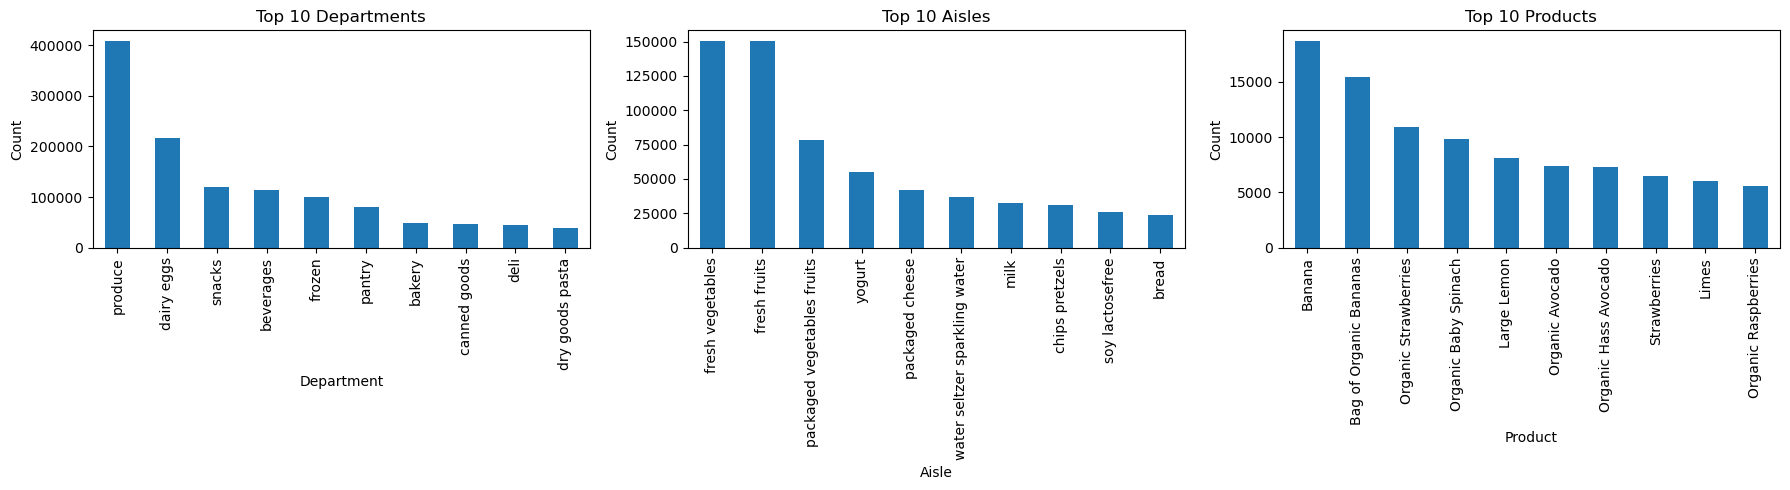

In [102]:
# Categorical cardinality analysis:
# Bar plots of the top 10 departments, aisles, and products
# to understand demand at category, sub-category, and item level.

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

training_data["department"].value_counts().head(10).plot(kind="bar", ax=axes[0])
axes[0].set_title("Top 10 Departments")
axes[0].set_xlabel("Department")
axes[0].set_ylabel("Count")

training_data["aisle"].value_counts().head(10).plot(kind="bar", ax=axes[1])
axes[1].set_title("Top 10 Aisles")
axes[1].set_xlabel("Aisle")
axes[1].set_ylabel("Count")

training_data["product_name"].value_counts().head(10).plot(kind="bar", ax=axes[2])
axes[2].set_title("Top 10 Products")
axes[2].set_xlabel("Product")
axes[2].set_ylabel("Count")

plt.tight_layout()
plt.show()


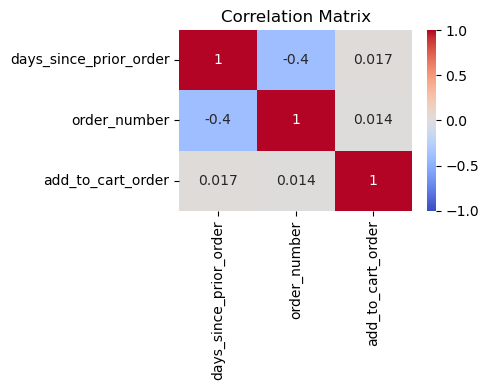

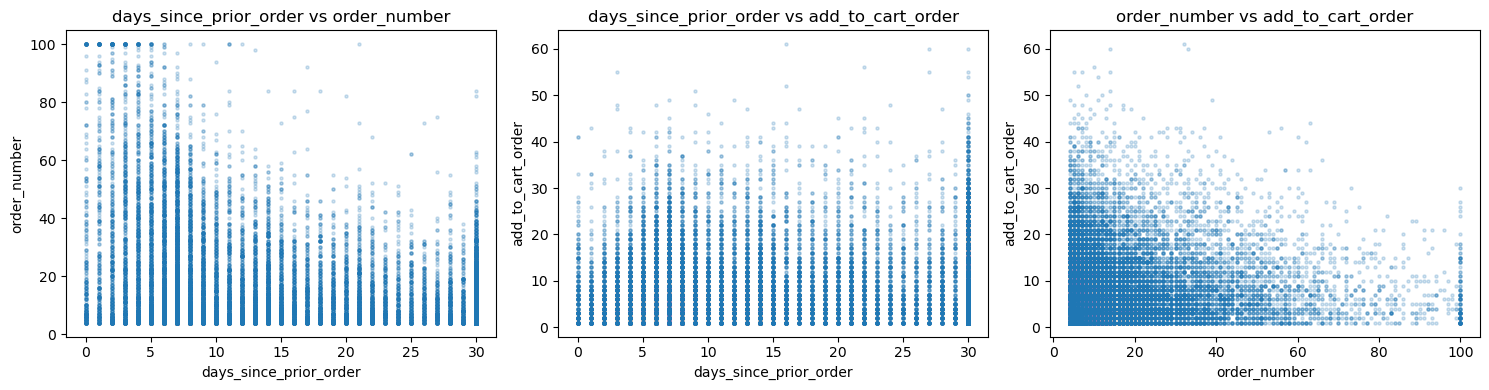

In [99]:
# Correlation matrix, heatmap, and pairwise scatter plots for selected numeric features

import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ["days_since_prior_order", "order_number", "add_to_cart_order"]

corr = training_data[num_cols].corr()

plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

pairs = [
    ("days_since_prior_order", "order_number"),
    ("days_since_prior_order", "add_to_cart_order"),
    ("order_number", "add_to_cart_order"),
]

sample = training_data[num_cols].sample(20000, random_state=42)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, (x, y) in zip(axes, pairs):
    ax.scatter(sample[x], sample[y], alpha=0.2, s=5)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(f"{x} vs {y}")

plt.tight_layout()
plt.show()


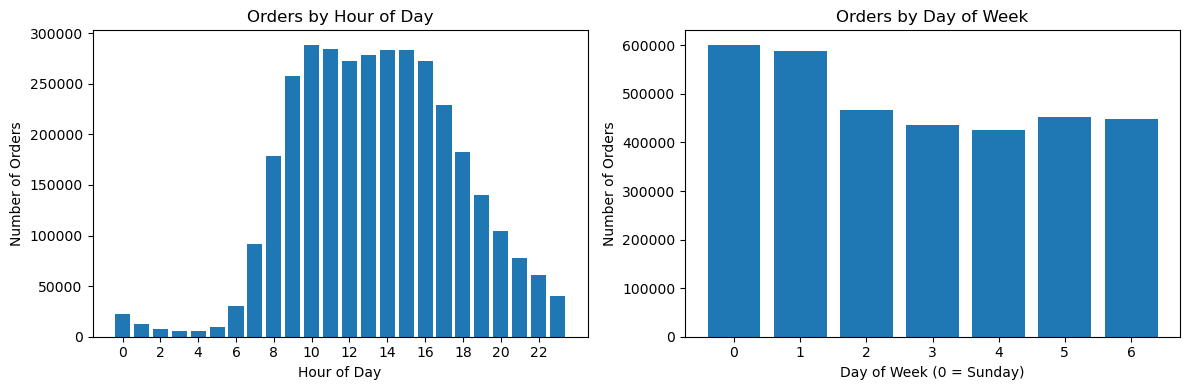

In [97]:
# Time-of-day and day-of-week seasonality (raw orders)

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

orders_per_hour = orders["order_hour_of_day"].value_counts().sort_index()
axes[0].bar(orders_per_hour.index, orders_per_hour.values)
axes[0].set_title("Orders by Hour of Day")
axes[0].set_xlabel("Hour of Day")
axes[0].set_ylabel("Number of Orders")
axes[0].set_xticks(range(0, 24, 2))

orders_per_dow = orders["order_dow"].value_counts().sort_index()
axes[1].bar(orders_per_dow.index, orders_per_dow.values)
axes[1].set_title("Orders by Day of Week")
axes[1].set_xlabel("Day of Week (0 = Sunday)")
axes[1].set_ylabel("Number of Orders")
axes[1].set_xticks(range(0, 7))

plt.tight_layout()
plt.show()


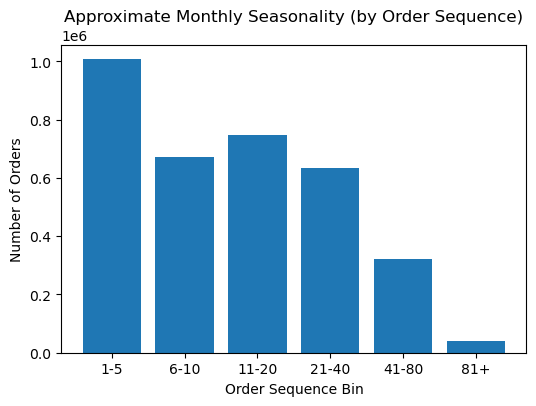

In [105]:
# Monthly seasonality plot (using order_number as a proxy for time)

import matplotlib.pyplot as plt
import pandas as pd

orders["order_seq_bin"] = pd.cut(
    orders["order_number"],
    bins=[0, 5, 10, 20, 40, 80, 200],
    labels=["1-5", "6-10", "11-20", "21-40", "41-80", "81+"]
)

orders_per_seq = orders["order_seq_bin"].value_counts().sort_index()

plt.figure(figsize=(6, 4))
plt.bar(orders_per_seq.index.astype(str), orders_per_seq.values)
plt.title("Approximate Monthly Seasonality (by Order Sequence)")
plt.xlabel("Order Sequence Bin")
plt.ylabel("Number of Orders")
plt.show()




In [ ]:
# لحد هون الخطوه الثانيه تمت 

In [104]:
# 3. Cleaning & Imputation

import numpy as np

# --- Missing value check ---
training_clean = training_data.copy()
print(training_clean.isna().sum())

# Impute numeric feature with median (example: days_since_prior_order)
median_days = training_clean["days_since_prior_order"].median()
training_clean["days_since_prior_order"] = training_clean["days_since_prior_order"].fillna(median_days)

# Impute categorical features with mode (most frequent value)
for col in ["department", "aisle"]:
    if training_clean[col].isna().sum() > 0:
        mode_val = training_clean[col].mode()[0]
        training_clean[col] = training_clean[col].fillna(mode_val)

# --- Outlier detection & treatment (winsorizing) ---
num_cols = ["days_since_prior_order", "order_number", "add_to_cart_order"]

for col in num_cols:
    q1 = training_clean[col].quantile(0.25)
    q3 = training_clean[col].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr   # upper bound

    # Winsorize: cap values above upper bound
    training_clean[col] = np.where(training_clean[col] > upper, upper, training_clean[col])


order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
aisle                     0
department                0
order_seq_bin             0
dtype: int64
